# Library

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.optim as optim
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import CoraFull
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CoraFull

In [ ]:
dataset_CoraFull = CoraFull(root='./data')
data_CoraFull = dataset_CoraFull[0]

Processing...
Done!


In [ ]:
print(f'Dataset: {dataset_CoraFull}:')
print(f'Number of graphs: {len(dataset_CoraFull)}')
print(f'Number of features: {dataset_CoraFull.num_features}')
print(f'Number of classes: {dataset_CoraFull.num_classes}')
print(f'Number of nodes in the graph: {data_CoraFull.num_nodes}')
print(f'Number of edges in the graph: {data_CoraFull.num_edges}')
print(f'Has isolated nodes: {data_CoraFull.has_isolated_nodes()}')
print(f'Has self-loops: {data_CoraFull.has_self_loops()}')
print(f'Is undirected: {data_CoraFull.is_undirected()}')
print(f'Average node degree: {data_CoraFull.num_edges / data_CoraFull.num_nodes:.2f}')
print(f'Number of node features: {dataset_CoraFull.num_node_features}')
print(f'Number of edge features: {dataset_CoraFull.num_edge_features}')

Dataset: CoraFull():
Number of graphs: 1
Number of features: 8710
Number of classes: 70
Number of nodes in the graph: 19793
Number of edges in the graph: 126842
Has isolated nodes: False
Has self-loops: False
Is undirected: True
Average node degree: 6.41
Number of node features: 8710
Number of edge features: 0


In [ ]:
# Split data to 70% Train, 10% Validation, 20% Test
split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
graph_CoreFull = split(data_CoraFull)

In [ ]:
print(f'Number of training nodes: {graph_CoreFull.train_mask.sum()}')
print(f'Number of validation nodes: {graph_CoreFull.val_mask.sum()}')
print(f'Number of test nodes: {graph_CoreFull.test_mask.sum()}')

Number of training nodes: 13855
Number of validation nodes: 1979
Number of test nodes: 3959


Training {0: 191, 1: 38, 2: 185, 3: 271, 4: 43, 5: 201, 6: 288, 7: 471, 8: 181, 10: 98, 11: 151, 12: 73, 14: 221, 15: 107, 16: 81, 13: 341, 17: 84, 18: 54, 19: 297, 20: 284, 21: 184, 22: 296, 23: 131, 25: 215, 26: 191, 28: 74, 30: 164, 35: 59, 33: 597, 37: 119, 39: 394, 9: 238, 38: 100, 34: 406, 24: 247, 42: 74, 45: 255, 43: 41, 46: 91, 47: 51, 48: 400, 41: 148, 27: 542, 50: 50, 52: 341, 54: 68, 55: 327, 56: 228, 57: 639, 58: 141, 59: 205, 53: 461, 29: 325, 60: 81, 31: 264, 40: 192, 61: 161, 51: 434, 63: 195, 64: 95, 36: 219, 49: 197, 65: 68, 66: 99, 62: 113, 67: 59, 44: 78, 32: 105, 68: 10, 69: 23}
Validation {0: 25, 9: 42, 5: 33, 4: 4, 12: 9, 6: 44, 15: 7, 24: 27, 26: 31, 29: 49, 34: 57, 39: 67, 13: 58, 25: 31, 45: 38, 33: 77, 49: 26, 51: 66, 47: 7, 55: 55, 54: 8, 11: 21, 20: 41, 59: 36, 3: 42, 57: 95, 23: 23, 22: 33, 41: 19, 53: 63, 58: 27, 8: 19, 21: 24, 46: 8, 37: 22, 52: 58, 48: 46, 60: 10, 14: 41, 10: 16, 38: 9, 36: 23, 2: 18, 56: 31, 42: 5, 44: 20, 28: 9, 27: 81, 63: 27, 31: 38

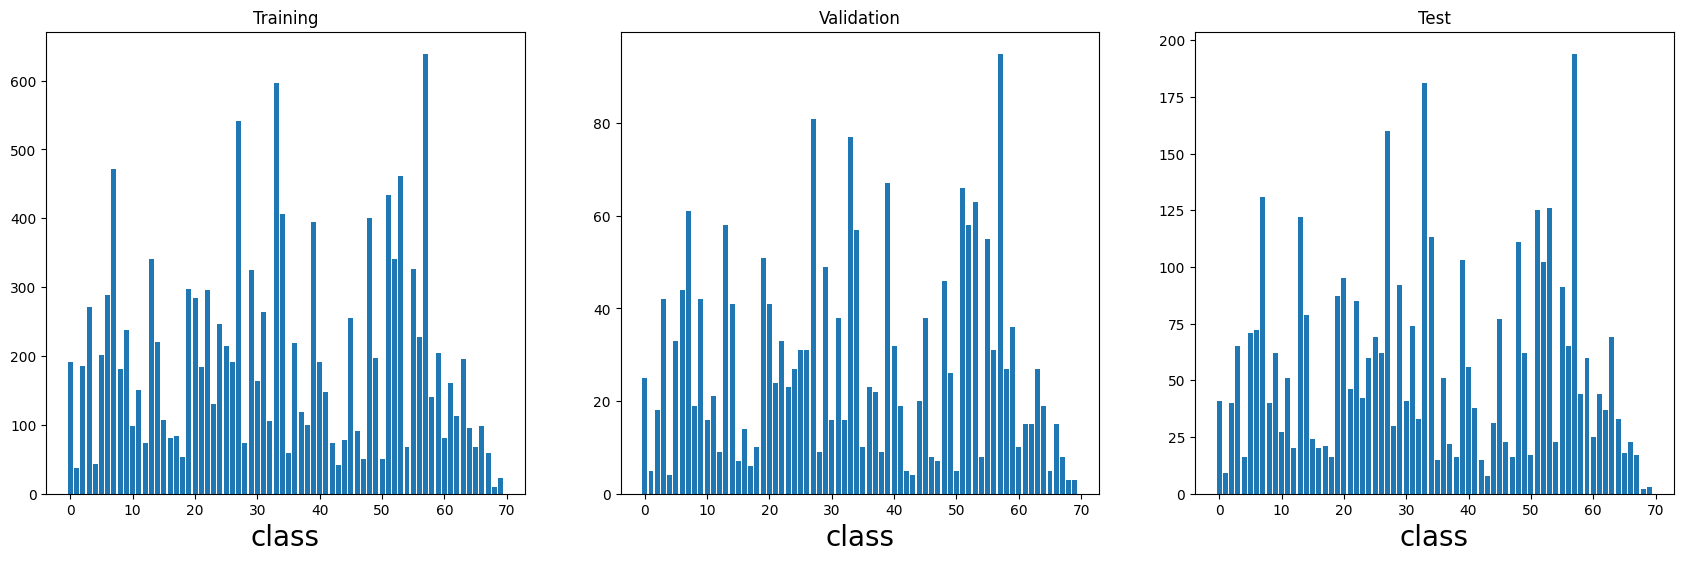

In [ ]:
split_type_array = np.zeros(graph_CoreFull.num_nodes)
split_type_array[np.where(graph_CoreFull.train_mask == True)[0]] = 1
split_type_array[np.where(graph_CoreFull.val_mask == True)[0]] = 2
split_type_array[np.where(graph_CoreFull.test_mask == True)[0]] = 3
titles = ["Training", "Validation", "Test"]
fig, axes = plt.subplots(ncols=3, figsize=(21, 6))
for i in range(3):
    counter = collections.Counter(graph_CoreFull.y.numpy()[np.where(split_type_array == i + 1)[0]])
    counter = dict(counter)
    print(titles[i], counter)
    count = [x[1] for x in sorted(counter.items())]
    axes[i].bar(range(dataset_CoraFull.num_classes), count)
    axes[i].set_xlabel("class", size=20)
    axes[i].set_title(titles[i])
plt.show()

# CiteSeer

In [ ]:
dataset_Cite = Planetoid(root='./data', name='CiteSeer')
data_Cite = dataset_Cite[0]

Processing...
Done!


In [ ]:
print(f'Dataset: {dataset_Cite}:')
print(f'Number of graphs: {len(dataset_Cite)}')
print(f'Number of features: {dataset_Cite.num_features}')
print(f'Number of classes: {dataset_Cite.num_classes}')
print(f'Number of nodes in the graph: {data_Cite.num_nodes}')
print(f'Number of edges in the graph: {data_Cite.num_edges}')
print(f'Has isolated nodes: {data_Cite.has_isolated_nodes()}')
print(f'Has self-loops: {data_Cite.has_self_loops()}')
print(f'Is undirected: {data_Cite.is_undirected()}')
print(f'Average node degree: {data_Cite.num_edges / data_Cite.num_nodes:.2f}')
print(f'Number of node features: {data_Cite.num_node_features}')
print(f'Number of edge features: {data_Cite.num_edge_features}')

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Number of nodes in the graph: 3327
Number of edges in the graph: 9104
Has isolated nodes: True
Has self-loops: False
Is undirected: True
Average node degree: 2.74
Number of node features: 3703
Number of edge features: 0


In [ ]:
# Split data to 70% Train, 10% Validation, 20% Test
split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
graph_Cite = split(data_Cite)

In [ ]:
print(f'Number of training nodes: {graph_Cite.train_mask.sum()}')
print(f'Number of validation nodes: {graph_Cite.val_mask.sum()}')
print(f'Number of test nodes: {graph_Cite.test_mask.sum()}')

Number of training nodes: 2329
Number of validation nodes: 333
Number of test nodes: 665


Training {3: 476, 1: 409, 5: 372, 2: 470, 4: 412, 0: 190}
Validation {0: 24, 3: 74, 2: 75, 4: 61, 1: 60, 5: 39}
Test {5: 97, 4: 123, 1: 121, 2: 123, 3: 151, 0: 50}


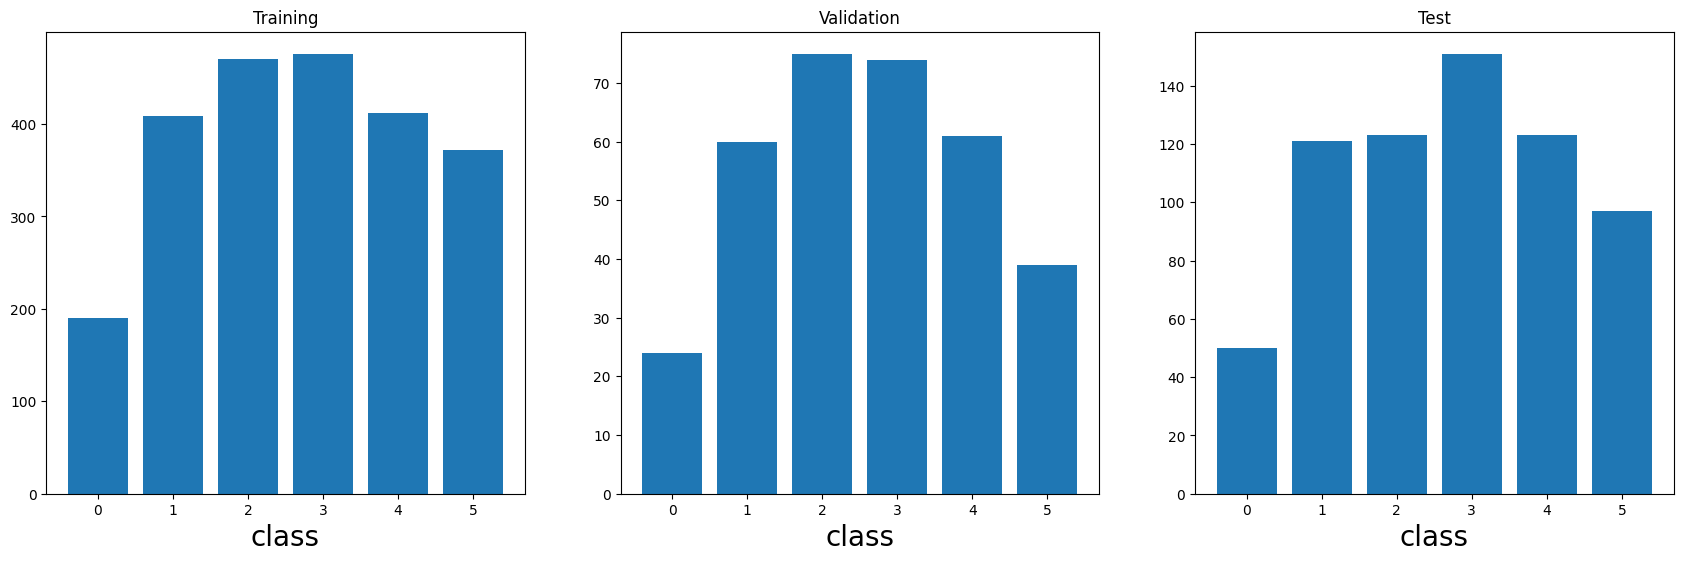

In [ ]:
split_type_array = np.zeros(graph_Cite.num_nodes)
split_type_array[np.where(graph_Cite.train_mask == True)[0]] = 1
split_type_array[np.where(graph_Cite.val_mask == True)[0]] = 2
split_type_array[np.where(graph_Cite.test_mask == True)[0]] = 3
titles = ["Training", "Validation", "Test"]
fig, axes = plt.subplots(ncols=3, figsize=(21, 6))
for i in range(3):
    counter = collections.Counter(graph_Cite.y.numpy()[np.where(split_type_array == i + 1)[0]])
    counter = dict(counter)
    print(titles[i], counter)
    count = [x[1] for x in sorted(counter.items())]
    axes[i].bar(range(dataset_Cite.num_classes), count)
    axes[i].set_xlabel("class", size=20)
    axes[i].set_title(titles[i])
plt.show()

## Config

In [ ]:
lrs = [0.01, 0.001, 0.005, 0.008, 0.009]
weight_decays = [5e-5, 1e-5, 5e-3, 1e-3]
hidden_channels = [16, 32, 64, 128, 256, 512]
num_heads = [1, 2, 3, 4]
num_layers = [1, 2, 3]
n_epochs = 100
datasets = {dataset_CoraFull: graph_CoreFull, dataset_Cite: graph_Cite}

## MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self, dataset):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(dataset.num_node_features, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, dataset.num_classes)
        )

    def forward(self, data):
        x = data.x
        output = self.layers(x)
        return output

In [ ]:
def eval_node_classifier(model, graph, mask):
    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())
    return acc

The best MLP model for CoraFull()
CoraFull() - Validation Accuracy of MLP model with learning rate 0.008 and weight decay 0.001: 0.5407


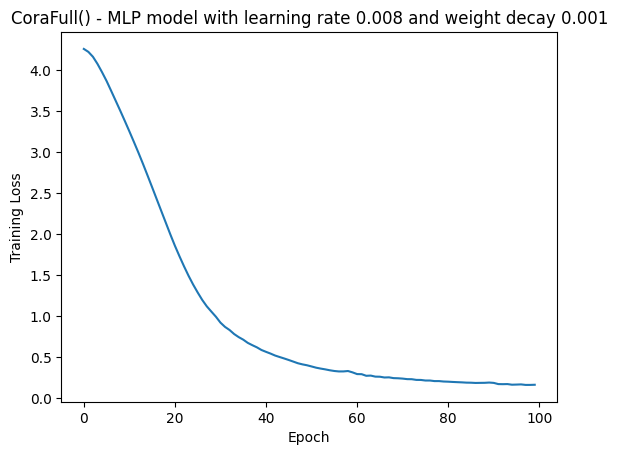


Test Accuracy for CoraFull(): 0.5352
The best MLP model for CiteSeer()
CiteSeer() - Validation Accuracy of MLP model with learning rate 0.001 and weight decay 5e-05: 0.7297


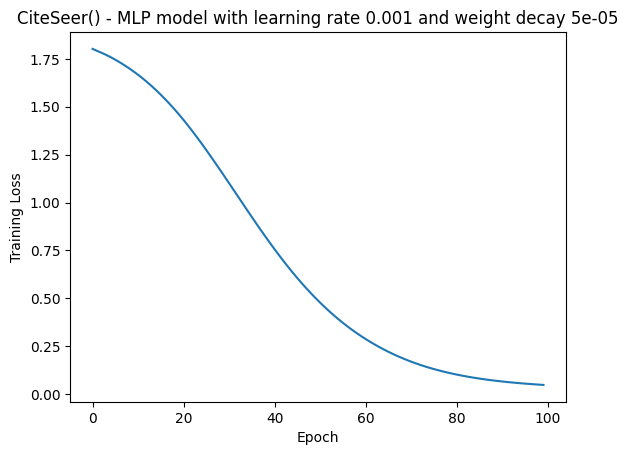


Test Accuracy for CiteSeer(): 0.7038


In [ ]:
for dataset, graph in datasets.items():
  max_acc = 0
  max_info = []
  for lr in lrs:
    for weight_decay in weight_decays:
      model = MLP(dataset)
      optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
      criterion = nn.CrossEntropyLoss()
      losses = []
      for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()
        losses.append(loss)

      losses_float = [float(loss) for loss in losses]
      loss_indices = [i for i,l in enumerate(losses_float)]

      acc = eval_node_classifier(model, graph, graph.val_mask)
      if acc > max_acc:
        max_acc = acc
        max_info = [lr, weight_decay, loss_indices, losses_float, model]

  print(f'The best MLP model for {dataset}')
  print(f'{dataset} - Validation Accuracy of MLP model with learning rate {max_info[0]} and weight decay {max_info[1]}: {max_acc:.4f}')
  plt.plot(max_info[2], max_info[3])
  plt.xlabel('Epoch')
  plt.ylabel('Training Loss')
  plt.title(f'{dataset} - MLP model with learning rate {max_info[0]} and weight decay {max_info[1]}')
  plt.show()

  test_acc = eval_node_classifier(max_info[-1], graph, graph.test_mask)
  print(f'\nTest Accuracy for {dataset}: {test_acc:.4f}')

## Utils

In [ ]:
def validation_step(model, graph):
    model.eval()
    out = model(graph.x.to(device), graph.edge_index.to(device))
    pred = out.argmax(dim=1)
    val_correct = pred[graph.val_mask] == graph.y[graph.val_mask]
    val_acc = int(val_correct.sum()) / int(graph.val_mask.sum())
    return val_acc

def test_step(model, graph):
    model.eval()
    out = model(graph.x.to(device), graph.edge_index.to(device))
    pred = out.argmax(dim=1)
    test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]
    test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())
    return test_acc

# [loss_indices, losses_float, num_layer, hidden_channel, lr, weight_decay, graph, model_gcn]
def plotBests(dataset, max_info, max_acc, title):
    print(f'The best {title} model for {dataset}')
    print(f'{dataset} - Validation Accuracy of {title} model with {max_info[2]}-layers, {max_info[3]}-hidden channels, {max_info[4]}-LR, and {max_info[5]}-Weight decay: {max_acc:.4f}')
    plt.plot(max_info[0], max_info[1])
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'{dataset} - {title} model with {max_info[2]}-layers, {max_info[3]}-hidden channels, {max_info[4]}-LR, and {max_info[5]}-Weight decay')
    plt.show()

    test_acc = test_step(max_info[7], max_info[6])
    print(f'\nTest Accuracy for {dataset}: {test_acc:.4f}')

## GCN

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, dataset, graph, hidden_channels, num_layers=1):
        super(GCN, self).__init__()
        self.dataset = dataset
        self.data = graph.to(device)
        torch.manual_seed(42)

        self.conv1 = GCNConv(self.dataset.num_features, hidden_channels)
        if num_layers >= 2:
            self.conv2 = GCNConv(hidden_channels, hidden_channels)
        if num_layers == 3:
            self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.out = Linear(hidden_channels, self.dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        if hasattr(self, 'conv2'):
            x = self.conv2(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)
        if hasattr(self, 'conv3'):
            x = self.conv3(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)

        x = F.softmax(self.out(x), dim=1)
        return x

The best GCN model for CoraFull()
CoraFull() - Validation Accuracy of GCN model with 1-layers, 512-hidden channels, 0.01-LR, and 1e-05-Weight decay: 0.5073


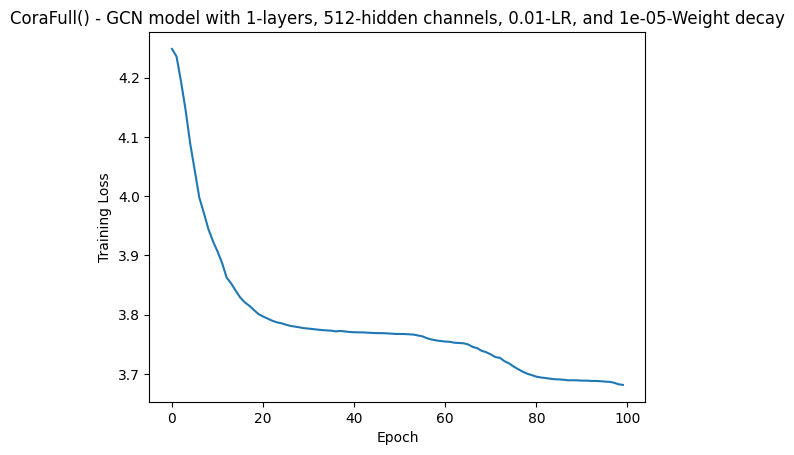


Test Accuracy for CoraFull(): 0.5037
The best GCN model for CiteSeer()
CiteSeer() - Validation Accuracy of GCN model with 3-layers, 512-hidden channels, 0.005-LR, and 0.001-Weight decay: 0.8048


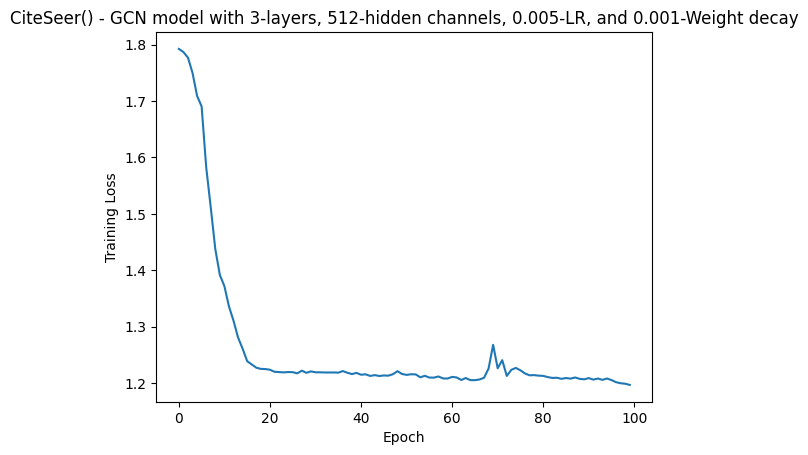


Test Accuracy for CiteSeer(): 0.7398


In [ ]:
for dataset, graph in datasets.items():
    max_acc = 0
    max_info = []
    for lr in lrs:
        for weight_decay in weight_decays:
            for num_layer in num_layers:
                for hidden_channel in hidden_channels:
                    model_gcn = GCN(dataset=dataset, graph=graph, hidden_channels=hidden_channel, num_layers=num_layer).to(device)
                    optimizer = torch.optim.Adam(model_gcn.parameters(), lr=lr, weight_decay=weight_decay)
                    criterion = nn.CrossEntropyLoss()
                    losses_gcn = []
                    for epoch in range(n_epochs):
                        model_gcn.train()
                        optimizer.zero_grad()
                        out = model_gcn(graph.x.to(device), graph.edge_index.to(device))
                        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
                        loss.backward()
                        optimizer.step()
                        losses_gcn.append(loss) #.item()

                    losses_float = [float(loss) for loss in losses_gcn]
                    loss_indices = [i for i,l in enumerate(losses_float)]

                    val_acc = validation_step(model_gcn, graph)
                    if val_acc > max_acc:
                        max_acc = val_acc
                        max_info = [loss_indices, losses_float, num_layer, hidden_channel, lr, weight_decay, graph, model_gcn]

    plotBests(dataset, max_info, max_acc, 'GCN')

## Config

In [ ]:
lrs = [0.01, 0.005]
weight_decays = [1e-5, 1e-3]
hidden_channels = [16, 32, 128, 512]

## GAT

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self, dataset, graph, hidden_channels, num_layers=1, num_heads=1):
        super(GAT, self).__init__()
        self.dataset = dataset
        self.data = graph.to(device)
        torch.manual_seed(42)

        self.conv1 = GATConv(
            in_channels=self.dataset.num_features,
            out_channels=hidden_channels,
            heads=num_heads,
        )
        if num_layers >= 2:
            self.conv2 = GATConv(
                in_channels=hidden_channels * num_heads,
                out_channels=hidden_channels,
                heads=num_heads,
            )
        if num_layers == 3:
            self.conv3 = GATConv(
                in_channels=hidden_channels * num_heads,
                out_channels=hidden_channels,
                heads=num_heads,
            )
        self.out = Linear(hidden_channels * num_heads, self.dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        if hasattr(self, 'conv2'):
            x = self.conv2(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)
        if hasattr(self, 'conv3'):
            x = self.conv3(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)

        x = F.softmax(self.out(x), dim=1)
        return x

The best GAT model for CoraFull()
CoraFull() - Validation Accuracy of GAT model with 1-layers, 128-hidden channels, 0.01-LR, and 1e-05-Weight decay: 0.5432


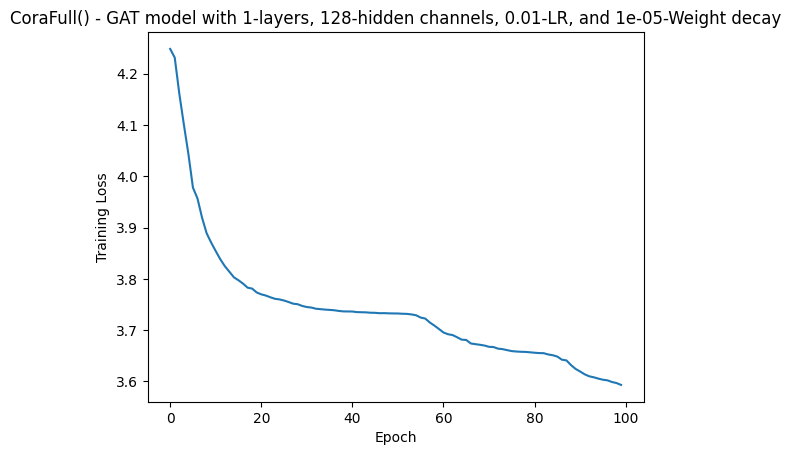


Test Accuracy for CoraFull(): 0.5395
The best GAT model for CiteSeer()
CiteSeer() - Validation Accuracy of GAT model with 2-layers, 32-hidden channels, 0.01-LR, and 1e-05-Weight decay: 0.7898


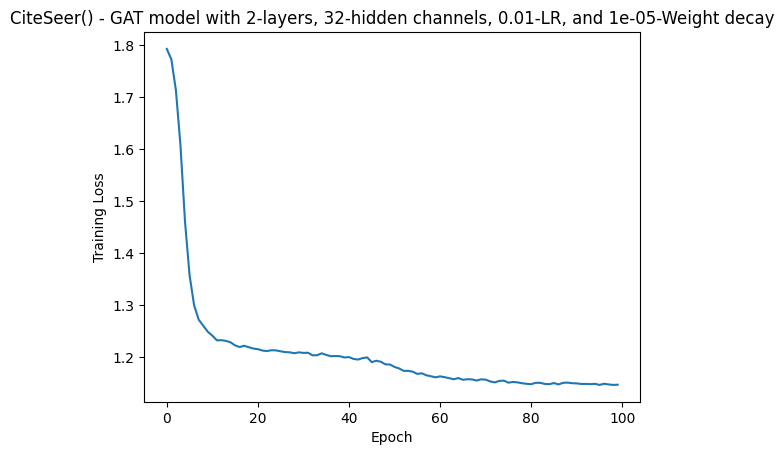


Test Accuracy for CiteSeer(): 0.7684


In [ ]:
for dataset, graph in datasets.items():
  max_acc = 0
  max_info = []
  for lr in lrs:
    for weight_decay in weight_decays:
      for num_layer in num_layers:
        for num_head in num_heads:
          for hidden_channel in hidden_channels:
            model_gat = GAT(dataset=dataset, graph=graph, hidden_channels=hidden_channel, num_layers=num_layer, num_heads=num_head).to(device)
            optimizer = torch.optim.Adam(model_gat.parameters(), lr=lr, weight_decay=weight_decay)
            criterion = nn.CrossEntropyLoss()
            losses_gat = []
            for epoch in range(n_epochs):
              model_gat.train()
              optimizer.zero_grad()
              out = model_gat(graph.x.to(device), graph.edge_index.to(device))
              loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
              loss.backward()
              optimizer.step()
              losses_gat.append(loss)

            losses_float = [float(loss) for loss in losses_gat]
            loss_indices = [i for i,l in enumerate(losses_float)]

            val_acc = validation_step(model_gat, graph)
            if val_acc > max_acc:
              max_acc = val_acc
              max_info = [loss_indices, losses_float, num_layer, hidden_channel, lr, weight_decay, graph, model_gat]

  plotBests(dataset, max_info, max_acc, 'GAT')

## GATv2

In [ ]:
hidden_channels = [16, 32, 128]

In [ ]:
class GAT2(torch.nn.Module):
    def __init__(self, dataset, graph, hidden_channels, num_layers=1, num_heads=1):
        super(GAT2, self).__init__()
        self.dataset = dataset
        self.data = graph.to(device)
        torch.manual_seed(42)

        self.conv1 = GATv2Conv(
            in_channels=self.dataset.num_features,
            out_channels=hidden_channels,
            heads=num_heads,
        )
        if num_layers >= 2:
            self.conv2 = GATv2Conv(
                in_channels=hidden_channels * num_heads,
                out_channels=hidden_channels,
                heads=num_heads,
            )
        if num_layers == 3:
            self.conv3 = GATv2Conv(
                in_channels=hidden_channels * num_heads,
                out_channels=hidden_channels,
                heads=num_heads,
            )
        self.out = Linear(hidden_channels * num_heads, self.dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        if hasattr(self, 'conv2'):
            x = self.conv2(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)
        if hasattr(self, 'conv3'):
            x = self.conv3(x, edge_index)
            x = x.relu()
            x = F.dropout(x, p=0.5, training=self.training)

        x = F.softmax(self.out(x), dim=1)
        return x

The best GATv2 model for CoraFull()
CoraFull() - Validation Accuracy of GATv2 model with 1-layers, 128-hidden channels, 0.01-LR, and 1e-05-Weight decay: 0.5301


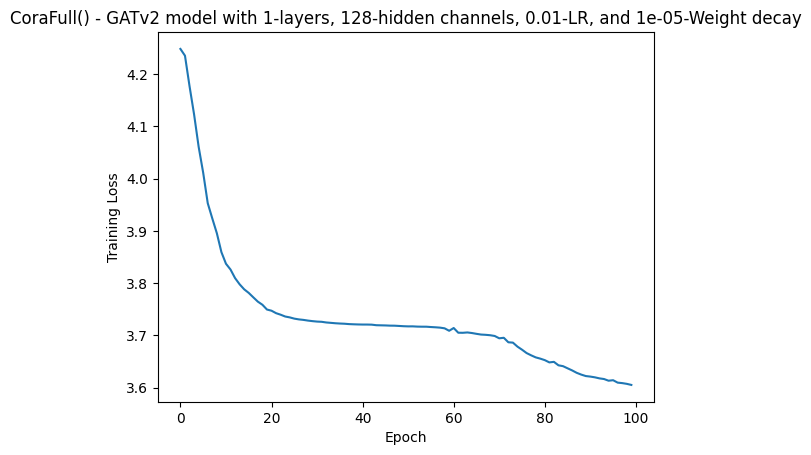


Test Accuracy for CoraFull(): 0.5168
Num head: 3
The best GATv2 model for CiteSeer()
CiteSeer() - Validation Accuracy of GATv2 model with 2-layers, 32-hidden channels, 0.005-LR, and 0.001-Weight decay: 0.8018


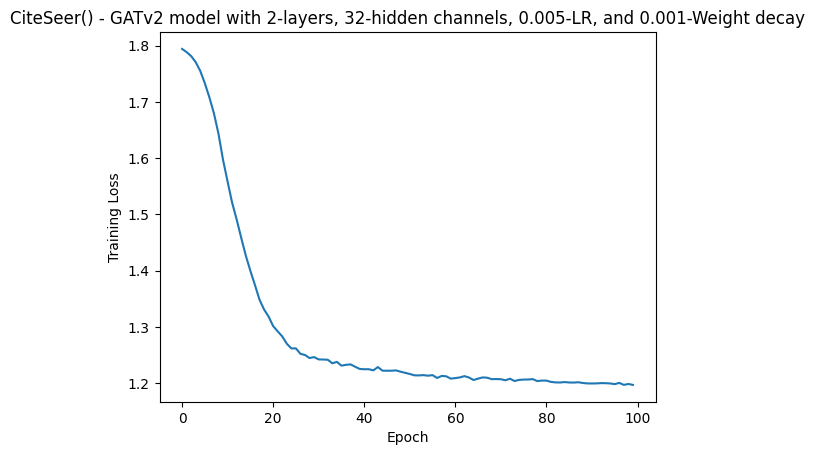


Test Accuracy for CiteSeer(): 0.7383
Num head: 2


In [ ]:
for dataset, graph in datasets.items():
  max_acc = 0
  max_info = []
  for lr in lrs:
    for weight_decay in weight_decays:
      for num_layer in num_layers:
        for num_head in num_heads:
          for hidden_channel in hidden_channels:
            model_gat2 = GAT2(dataset=dataset, graph=graph, hidden_channels=hidden_channel, num_layers=num_layer, num_heads=num_head).to(device)
            optimizer = torch.optim.Adam(model_gat2.parameters(), lr=lr, weight_decay=weight_decay)
            criterion = nn.CrossEntropyLoss()
            losses_gat2 = []
            for epoch in range(n_epochs):
              model_gat2.train()
              optimizer.zero_grad()
              out = model_gat2(graph.x.to(device), graph.edge_index.to(device))
              loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
              loss.backward()
              optimizer.step()
              losses_gat2.append(loss)

            losses_float = [float(loss) for loss in losses_gat2]
            loss_indices = [i for i,l in enumerate(losses_float)]

            val_acc = validation_step(model_gat2, graph)
            if val_acc > max_acc:
              max_acc = val_acc
              max_info = [loss_indices, losses_float, num_layer, hidden_channel, lr, weight_decay, graph, model_gat2, num_head]

  plotBests(dataset, max_info, max_acc, 'GATv2')
  print(f'Num head: {max_info[-1]}')